In [4]:
!pip install opendatasets


In [5]:
import opendatasets as od

In [6]:
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alaminbabu
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:08<00:00, 134MB/s]


In [15]:
# import section
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt

In [7]:
#generators (eta puro data k batch wise vag hoye jay ar eksathe oi 1 ta batch e load load hoy)
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(128, 128),
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(128, 128),
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
#Normalization
def process(image,label):
  image = tf.cast(image/255.0, tf.float32)
  return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [9]:
# Create CNN Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu', input_shape =(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu', input_shape =(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu', input_shape =(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,312,961 (12.64 MB)

 Trainable params: 3,312,961 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [12]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.5510 - loss: 0.6776 - val_accuracy: 0.7440 - val_loss: 0.5180
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.7649 - loss: 0.4910 - val_accuracy: 0.8126 - val_loss: 0.4193
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.8262 - loss: 0.3933 - val_accuracy: 0.8172 - val_loss: 0.4124
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8663 - loss: 0.3142 - val_accuracy: 0.7958 - val_loss: 0.5275
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9045 - loss: 0.2278 - val_accuracy: 0.8332 - val_loss: 0.4801


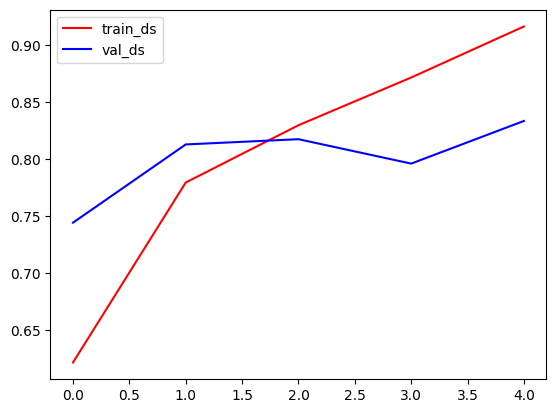

In [19]:
plt.plot(history.history['accuracy'],color='red',label='train_ds')
plt.plot(history.history['val_accuracy'],color='blue',label = 'val_ds')
plt.legend()
plt.show()

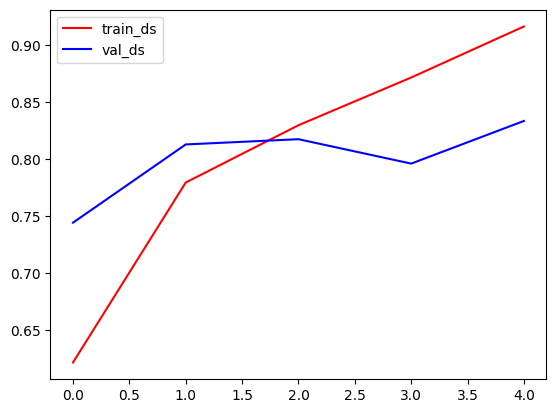

In [20]:
plt.plot(history.history['accuracy'],color='red',label='train_ds')
plt.plot(history.history['val_accuracy'],color='blue',label = 'val_ds')
plt.legend()
plt.show()

In [21]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9442 - loss: 0.1400 - val_accuracy: 0.8304 - val_loss: 0.6147
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.9622 - loss: 0.0981 - val_accuracy: 0.8176 - val_loss: 0.6669
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9725 - loss: 0.0717 - val_accuracy: 0.8280 - val_loss: 0.7310
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.9826 - loss: 0.0498 - val_accuracy: 0.8168 - val_loss: 1.0209
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.9843 - loss: 0.0480 - val_accuracy: 0.8078 - val_loss: 0.8673


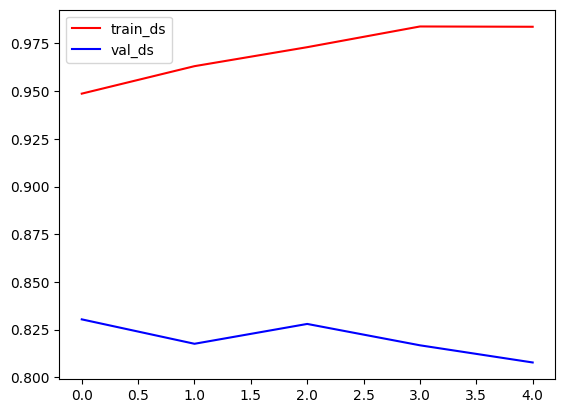

In [22]:
plt.plot(history.history['accuracy'],color='red',label='train_ds')
plt.plot(history.history['val_accuracy'],color='blue',label = 'val_ds')
plt.legend()
plt.show()

# New Section

In [23]:
import cv2


In [47]:
img  = cv2.imread('/ct1.jpg')



In [48]:
img.shape

(872, 921, 3)

In [49]:
img = cv2.resize(img,(128,128))
img.shape

(128, 128, 3)

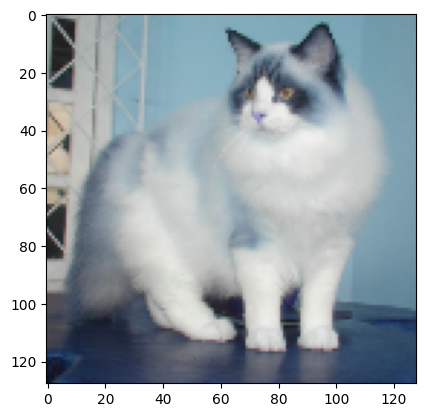

In [50]:
plt.imshow(img)

In [51]:
input = img.reshape((1,128,128,3))

In [53]:
model.predict(input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.]], dtype=float32)